In [1]:
# Description: This uses MACD crossover to determine when to buy and sell a stock.
# MACD, which stands for moving average convergence/divergence, is a trading indicator
# used in stock price technical analysis. It is intended to reveal changes in the strength, 
# direction, momentum, and duration of a stock's price trend. The MACD indicator is made up 
# of three time series that are calculated from historical price data, most commonly the closing price.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use("fivethirtyeight")

In [70]:
df = web.DataReader('AMC', data_source = 'yahoo', start = '2021-01-01', end = '2022-01-01')


In [71]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,2.200000,2.000000,2.20,2.010000,29873800,2.010000
2021-01-05,2.030000,1.910000,1.99,1.980000,28148300,1.980000
2021-01-06,2.230000,1.970000,2.03,2.010000,67363300,2.010000
2021-01-07,2.110000,2.020000,2.08,2.050000,26150500,2.050000
2021-01-08,2.210000,2.070000,2.09,2.140000,39553300,2.140000
...,...,...,...,...,...,...
2021-12-27,29.389999,27.010000,28.35,28.700001,30785600,28.700001
2021-12-28,29.740000,27.590000,28.18,27.719999,31588100,27.719999
2021-12-29,28.350000,26.620001,27.75,27.950001,30983400,27.950001


Text(0, 0.5, 'Price USD $')

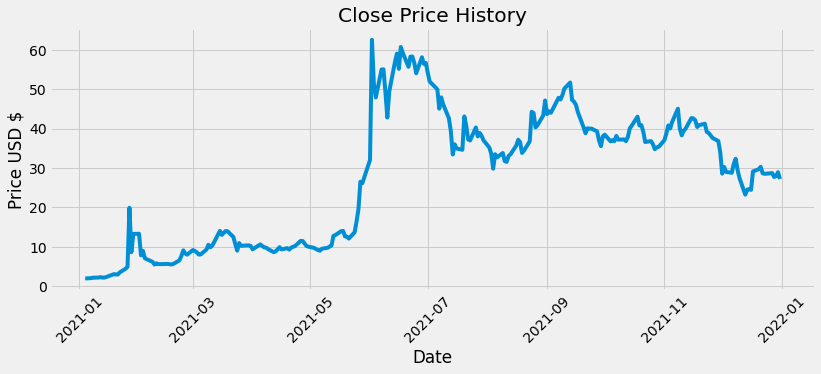

In [72]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df['Close'], label = 'Close')
plt.xticks(rotation = 45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD $')


In [73]:
# Calculate signal line indicators and MACD, and short term exponential moving average (EMA)
shortema = df.Close.ewm(span = 12, adjust = False).mean()
# long term exponential moving average (EMA)
longema = df.Close.ewm(span = 26, adjust = False).mean()
macd = shortema - longema
# Signal line
signal = macd.ewm(span = 9, adjust = False).mean()

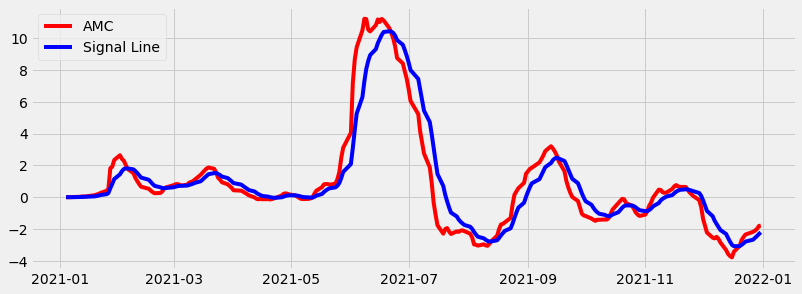

In [86]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, macd, label = "AMC", color = 'red')
plt.plot(df.index, signal, label = "Signal Line", color = 'blue')
plt.legend(loc ='upper left')
plt.show()

In [87]:
# Create new colums for the data
df['MACD'] = macd
df['Signal Line'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-01-04,2.200000,2.000000,2.20,2.010000,29873800,2.010000,0.000000,0.000000,NaN,NaN
2021-01-05,2.030000,1.910000,1.99,1.980000,28148300,1.980000,-0.002393,-0.000479,NaN,1.98
2021-01-06,2.230000,1.970000,2.03,2.010000,67363300,2.010000,-0.001848,-0.000752,NaN,NaN
2021-01-07,2.110000,2.020000,2.08,2.050000,26150500,2.050000,0.001792,-0.000244,2.05,NaN
2021-01-08,2.210000,2.070000,2.09,2.140000,39553300,2.140000,0.011802,0.002165,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,29.389999,27.010000,28.35,28.700001,30785600,28.700001,-2.177584,-2.668220,NaN,NaN
2021-12-28,29.740000,27.590000,28.18,27.719999,31588100,27.719999,-2.098306,-2.554237,NaN,NaN
2021-12-29,28.350000,26.620001,27.75,27.950001,30983400,27.950001,-1.993935,-2.442177,NaN,NaN


In [88]:
# Function to signal when to buy and sell
def buysell(signal):
    buy =  []
    sell = []
    flag = -1
    for i in range(0, len(signal)):
        if (signal['MACD'][i] > signal["Signal Line"][i]):
            sell.append(np.nan)
            if flag != 1:
                buy.append(signal['Close'][i])
                flag = 1
            else:
                buy.append(np.nan)
        elif signal['MACD'][i] < signal["Signal Line"][i]:
            buy.append(np.nan)
            if flag != 0:
                sell.append(signal['Close'][i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return (buy, sell)

In [89]:
# Create buy and sell column
a = buysell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [90]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2021-01-04,2.200000,2.000000,2.20,2.010000,29873800,2.010000,0.000000,0.000000,NaN,NaN
2021-01-05,2.030000,1.910000,1.99,1.980000,28148300,1.980000,-0.002393,-0.000479,NaN,1.98
2021-01-06,2.230000,1.970000,2.03,2.010000,67363300,2.010000,-0.001848,-0.000752,NaN,NaN
2021-01-07,2.110000,2.020000,2.08,2.050000,26150500,2.050000,0.001792,-0.000244,2.05,NaN
2021-01-08,2.210000,2.070000,2.09,2.140000,39553300,2.140000,0.011802,0.002165,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,29.389999,27.010000,28.35,28.700001,30785600,28.700001,-2.177584,-2.668220,NaN,NaN
2021-12-28,29.740000,27.590000,28.18,27.719999,31588100,27.719999,-2.098306,-2.554237,NaN,NaN
2021-12-29,28.350000,26.620001,27.75,27.950001,30983400,27.950001,-1.993935,-2.442177,NaN,NaN


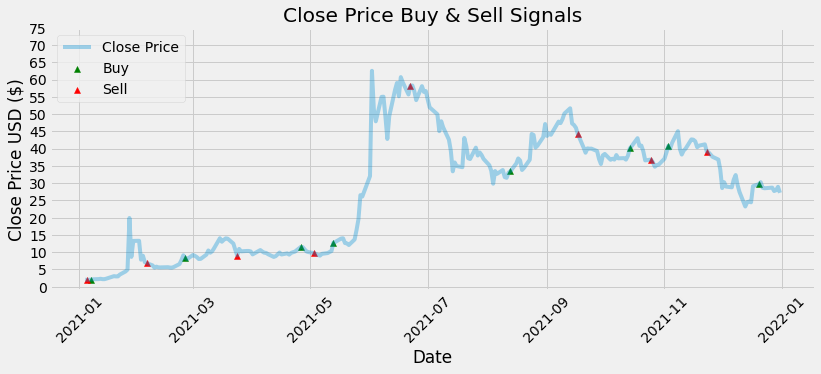

In [110]:
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green',marker ='^', alpha =1, label = 'Buy')
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red',marker ='^', alpha =1, label = 'Sell')
plt.plot(df['Close'], label = 'Close Price', alpha = 0.35)
plt.xticks(rotation = 45)
plt.yticks(range(0,80,5))
plt.title(f"Close Price Buy & Sell Signals")
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()